In [14]:
import os 
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

In [15]:
train_dir = "C:/Users/THARUN/Downloads/lung/chest_xray/train"
test_dir = "C:/Users/THARUN/Downloads/lung/chest_xray/test"
val_dir = "C:/Users/THARUN/Downloads/lung/chest_xray/val"

In [16]:
ig = tf.keras.preprocessing.image.ImageDataGenerator()
train_ig = ig.flow_from_directory(train_dir,class_mode = "binary")
test_ig = ig.flow_from_directory(test_dir,class_mode = "binary")
val_ig = ig.flow_from_directory(val_dir,class_mode = "binary")

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128,(3,3),input_shape=(256,256,3),activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,(3,3),activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32,(3,3),activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation = tf.nn.relu),
    tf.keras.layers.Dense(128,activation = tf.nn.relu),
    tf.keras.layers.Dense(64,activation = tf.nn.relu),
    tf.keras.layers.Dense(32,activation = tf.nn.relu),
    tf.keras.layers.Dense(1,activation = tf.nn.sigmoid)
])

In [18]:
model.compile(optimizer="Adam",
             loss = "binary_crossentropy",
             metrics = "accuracy")

In [19]:
history = model.fit(train_ig, epochs=5,batch_size= 163)
model.save("model_weights.h5")

Epoch 1/5
163/163 [==============================] - 499s 3s/step - loss: 1.1718 - accuracy: 0.8368
Epoch 2/5
163/163 [==============================] - 524s 3s/step - loss: 0.1689 - accuracy: 0.9375
Epoch 3/5
163/163 [==============================] - 567s 3s/step - loss: 0.1093 - accuracy: 0.9588
Epoch 4/5
163/163 [==============================] - 563s 3s/step - loss: 0.0892 - accuracy: 0.9689
Epoch 5/5
163/163 [==============================] - 562s 3s/step - loss: 0.0596 - accuracy: 0.9774


In [20]:
weights = model.save("model_weights.h5")

In [21]:
print()

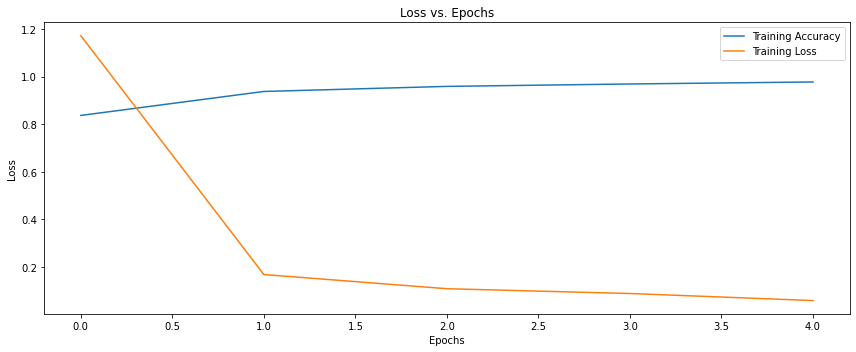

In [22]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
# Plot loss vs. epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.tight_layout()
plt.show()